In [45]:
# !pip install tensorflow

In [1]:
import tensorflow as tf
import pandas as pd

# Import Layers, Optimizers, and the Model Creation Function:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam  # Optimize training and weight calculation
from tensorflow.keras.models import Model  # Combine our layers and for the Neural Network

In [2]:
data = pd.read_csv('C:/Users/migue/Desktop/MachineLearning/prueba/rileys_data.csv')
data.head(1)

,AIRLINE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,...,dest_SNWD,dest_AWND,dest_PRCP,CRS_DEP_Datetime,15_DELAYED,year,month,day,day_of_week,hour
0,Spirit Air Lines,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",-2.0,2041,-1.0,0.0,0.0,...,0.0,55.0,8.0,2020-02-23 18:40:00,0,2020,2,23,6,18


In [3]:
data.columns

Index(['AIRLINE', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'ori_TMIN', 'ori_TMAX', 'ori_SNOW', 'ori_SNWD', 'ori_AWND', 'ori_PRCP',
       'dest_TMIN', 'dest_TMAX', 'dest_SNOW', 'dest_SNWD', 'dest_AWND',
       'dest_PRCP', 'CRS_DEP_Datetime', '15_DELAYED', 'year', 'month', 'day',
       'day_of_week', 'hour'],
      dtype='object')

In [5]:
used_data=data.loc[:,~data.columns.isin(['AIRLINE', 'ORIGIN', 'DEST','ORIGIN_CITY', 'DEST_CITY','DEP_DELAY','ARR_DELAY','CANCELLED','DIVERTED','CRS_DEP_Datetime','CRS_ARR_TIME'])].copy()
used_data.columns

Index(['DISTANCE', 'ori_TMIN', 'ori_TMAX', 'ori_SNOW', 'ori_SNWD', 'ori_AWND',
       'ori_PRCP', 'dest_TMIN', 'dest_TMAX', 'dest_SNOW', 'dest_SNWD',
       'dest_AWND', 'dest_PRCP', '15_DELAYED', 'year', 'month', 'day',
       'day_of_week', 'hour'],
      dtype='object')

In [50]:
# categorical_cols = ['AIRLINE', 'ORIGIN', 'DEST']
# encoded_data = pd.get_dummies(used_data, columns=categorical_cols)

In [17]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [col for col in used_data.columns]
scaler = StandardScaler()
used_data[numeric_cols] = scaler.fit_transform(used_data[numeric_cols])
used_data.head(1)

encoded_data=used_data
used_data.shape

(1255864, 19)

In [12]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop(columns=['15_DELAYED'])  # Asegúrate de reemplazar 'TARGET_COLUMN' con el nombre de tu columna objetivo
y = encoded_data['15_DELAYED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define input layer
input_layer = Input(shape=(18,), name="Input")

# First hidden layer
dense1 = Dense(150, activation="relu", name="Dense_Layer_1")(input_layer)

# Second hidden layer
dense2 = Dense(75, activation="relu", name="Dense_Layer_2")(dense1)

# Output layer
output_layer = Dense(1, activation="linear", name="Output_Layer")(dense2)

# Putting it all together
network = Model(inputs=[input_layer], outputs=[output_layer])

# Summary of the Artificial Neural Network
network.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 150)            │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# ######################################################### #
#            LOSS FUNCTION & OPTIMIZER FOR ANN
# ######################################################### #
network.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate controls how fast your network converges to a *potential* solution
    loss=[tf.keras.losses.MeanSquaredError()],  # Loss Function (Target Function) --> Choice of loss function is CRITICAL to performance!
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()]  # Monitor the training & validation process
)

network.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 150)            │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
len(y_train)  # How much training data

1004691

In [61]:
# Train the Network !!!
training_history = network.fit(
    X_train, y_train, # Specify set of predictors and target feature
    validation_data=(X_test, y_test),  # Validate our training on data it's never seen before
    batch_size=10000,  # 10000-observations creating a batch (MINI-BATCH GRADIENT DESCENT)
    epochs=200,  # 2000-complete training cycles (epochs)
    verbose=1,  # See the training progress
)

Epoch 1/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.9123 - mean_absolute_error: 0.7577 - root_mean_squared_error: 0.9551 - val_loss: 0.9127 - val_mean_absolute_error: 0.7552 - val_root_mean_squared_error: 0.9554
Epoch 2/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9078 - mean_absolute_error: 0.7528 - root_mean_squared_error: 0.9528 - val_loss: 0.9123 - val_mean_absolute_error: 0.7523 - val_root_mean_squared_error: 0.9551
Epoch 3/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9051 - mean_absolute_error: 0.7504 - root_mean_squared_error: 0.9514 - val_loss: 0.9121 - val_mean_absolute_error: 0.7574 - val_root_mean_squared_error: 0.9550
Epoch 4/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9074 - mean_absolute_error: 0.7521 - root_mean_squared_error: 0.9526 - val_loss: 0.9119 - val_mean_absolute_error: 0.7560 - val_root_mean_squared_error: 0.9549
Epoch 5/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9066 - mean_absolute_error: 0.7508 - root_m

Text(0, 0.5, 'Average Error')

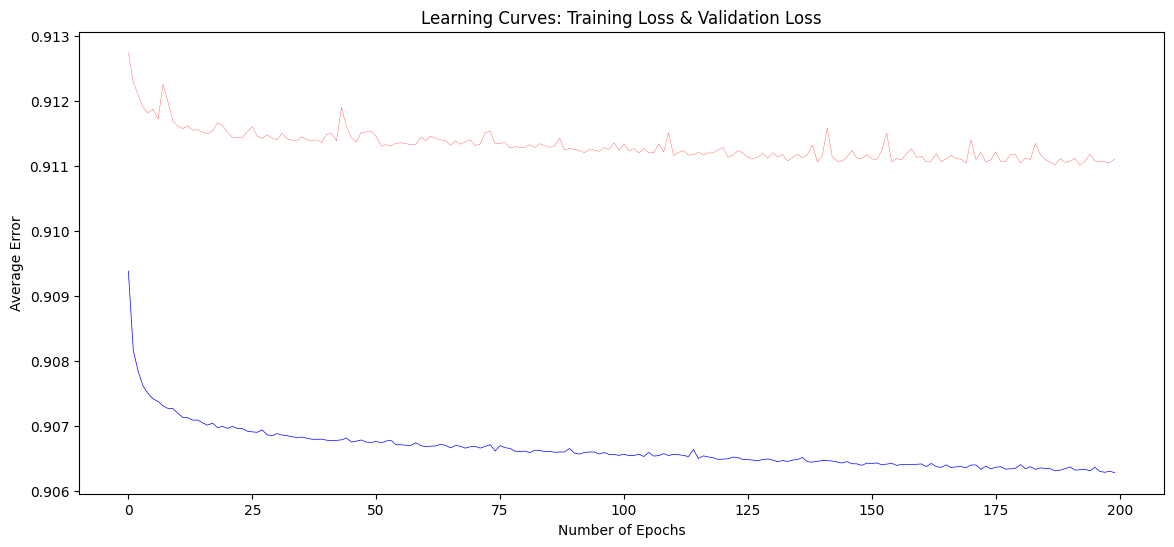

In [62]:
# LEARNING CURVES
training_dict = training_history.history

# LOSS & VALIDATION CURVES
loss_curve = training_dict["loss"]
val_loss_curve = training_dict["val_loss"]
epochs = range(0, len(loss_curve))  # How many training iterations (cycles) the Network was trained on

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
# Training Loss Curve
ax.plot(epochs, loss_curve, zorder=0, c="blue", lw=0.5)
# Validation Loss Curve
ax.plot(epochs, val_loss_curve, zorder=1, c='red', lw=0.2)

ax.set_title("Learning Curves: Training Loss & Validation Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Average Error")

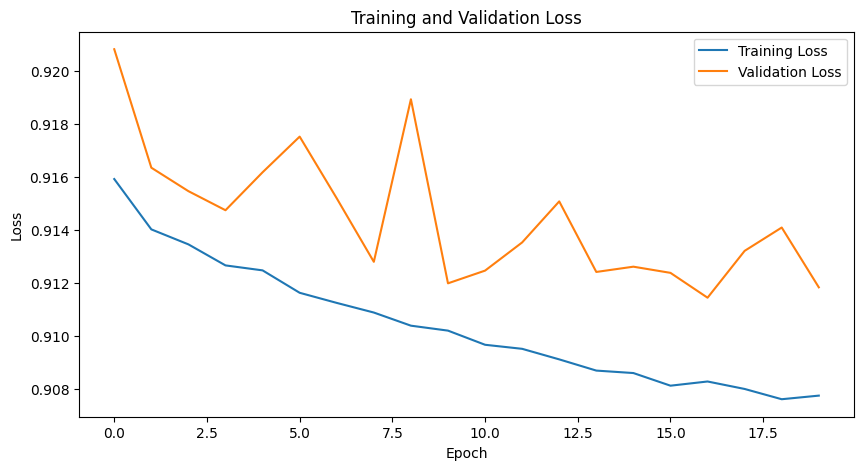

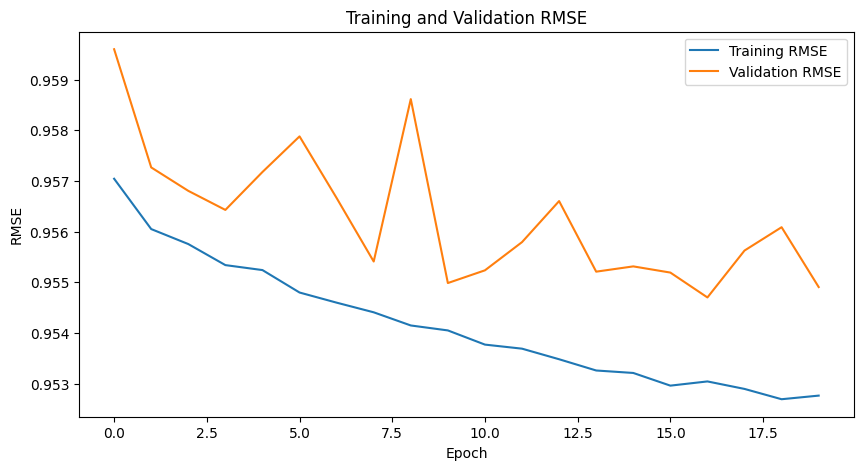

Text(0, 0.5, 'MAE')

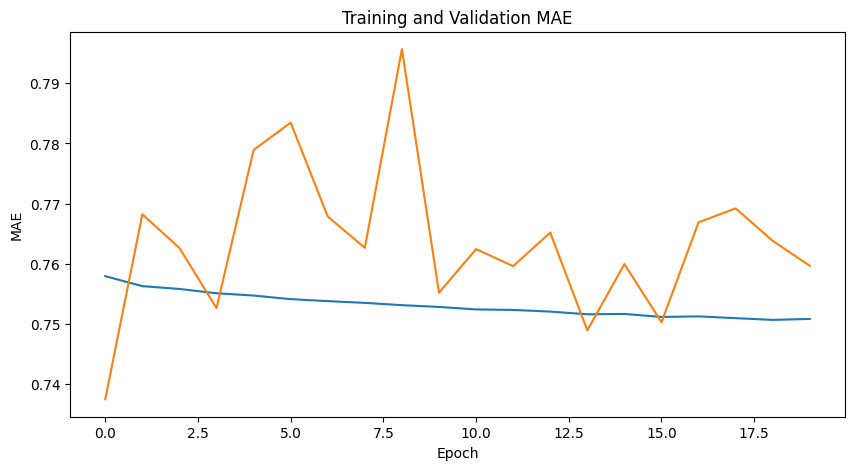

In [47]:
import matplotlib.pyplot as plt

# Obtener la pérdida y las métricas de rendimiento del training_history
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
rmse = training_history.history['root_mean_squared_error']
val_rmse = training_history.history['val_root_mean_squared_error']
mae = training_history.history['mean_absolute_error']
val_mae = training_history.history['val_mean_absolute_error']

# Plotear la pérdida
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotear las métricas de rendimiento
plt.figure(figsize=(10, 5))
plt.plot(rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
